# Homework 2

In [32]:
%matplotlib inline

In [75]:
# imports
import numpy as np

from scipy.integrate import ode
from scipy.integrate import solve_ivp

from matplotlib import pyplot as plt
import seaborn as sns

import pandas

In [23]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

# Quantitative 1

## (a) Solve the ODEs

## Logistic equation

## $\frac{dx}{dt} = r x \left [ 1 - \frac{x}{k} \right ]$

In [4]:
def logistic(t, x, r=0.3, k=0.8):
    return r*x * (1- x/k)

In [57]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html
r_logistic = ode(logistic).set_integrator('zvode', method='bdf')

### Evaluations

In [41]:
def eval_logistic(t0, x0, dt=1., tstep=100):
    # Init
    r_logistic.set_initial_value(x0, t0)
    ts, rs = [], []
    # Loop
    for ii in range(tstep):
        # Evaluate
        ev = float(np.real(r_logistic.integrate(r_logistic.t+dt)))
        # Save
        ts.append(r_logistic.t)
        rs.append(ev)
    #
    return [t0]+ts, [x0]+rs

### Initial conditions (positive)

In [52]:
x0s = [0.1, 0.5, 1., 2.]
t0s = [0.]*len(x0s)

### Plot

Text(0, 0.5, 'x')

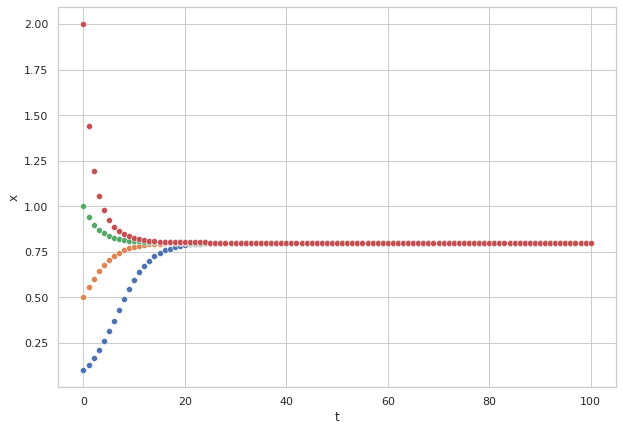

In [54]:
fig = plt.figure(figsize=(10,7))
for t0, x0 in zip(t0s, x0s):
    #import pdb; pdb.set_trace()
    ts, rs = eval_logistic(t0, x0)
    ax = sns.scatterplot(x=ts, y=rs)
#
ax.set_xlabel('t')
ax.set_ylabel('x')

### These are all attracted to $x=0.8$

### How about some negative initial conditions?

In [55]:
x0sn = [-2.]
t0sn = [0.]*len(x0sn)

/home/xavier/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ode.py:1012: UserWarning: zvode: Excess work done on this call. (Perhaps wrong MF.)
  self.messages.get(istate, unexpected_istate_msg)))
/home/xavier/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ode.py:1012: UserWarning: zvode: Excess accuracy requested. (Tolerances too small.)
  self.messages.get(istate, unexpected_istate_msg)))


Text(0, 0.5, 'x')

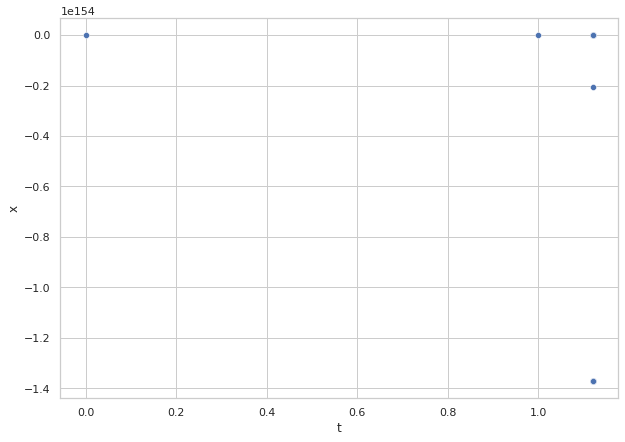

In [56]:
fig = plt.figure(figsize=(10,7))
for t0, x0 in zip(t0sn, x0sn):
    #import pdb; pdb.set_trace()
    ts, rs = eval_logistic(t0, x0)
    ax = sns.scatterplot(x=ts, y=rs)
#
ax.set_xlabel('t')
ax.set_ylabel('x')

## Lorenz equations

## $\frac{dX}{dt} = p r (-X + Y)$

## $\frac{dY}{dt} = rX - Y - XZ$

## $\frac{dZ}{dt} = XY - bZ$

### Define the functions

In [68]:
def lorentz(t, XYZ, pbr):
    dXdt = pbr[0] * (-XYZ[0] + XYZ[1])
    dYdt = pbr[2]*XYZ[0] - XYZ[1] - XYZ[0]*XYZ[2]
    dZdt = XYZ[0]*XYZ[1] - pbr[1]*XYZ[2]
    # 
    return dXdt, dYdt, dZdt

### $pr = 10, b=8/3, r=0.5$

In [62]:
pbr0 = (10., 8/3., .5)

### Initial conditions

In [80]:
nstep = 100
tspan = np.linspace(0, 5, nstep)

In [94]:
XYZs = [[0., 0., 0.], [1., 1., 1.], [-1, 0., 1.], [-1,-1,-1]]
t0s = [0., 0., 0.]*len(x0sn)

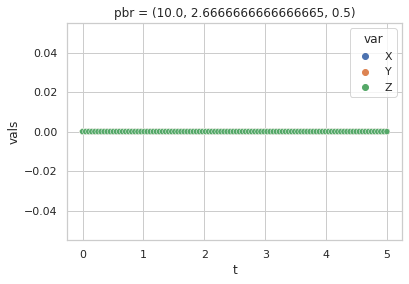

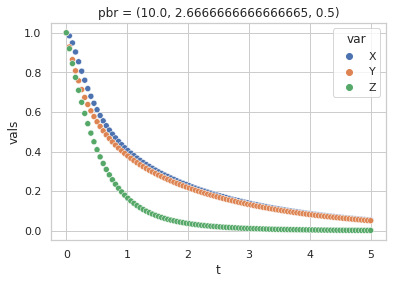

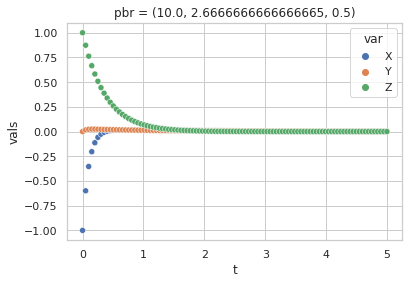

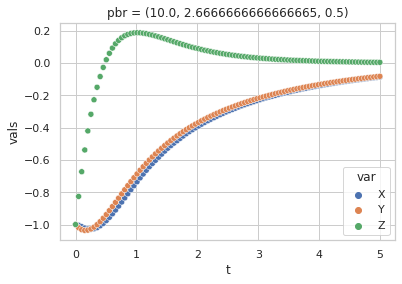

In [95]:
for kk in range(len(XYZs)):
    # %% Solve differential equation
    XYZ = XYZs[kk]
    sol = solve_ivp(lambda t, xyz: lorentz(t, xyz, pbr0), 
                [tspan[0], tspan[-1]], XYZ, t_eval=tspan)
    # Table me
    df = pandas.DataFrame(dict(t=np.array([sol.t]*3).flatten(), vals=sol.y.flatten(),
                          var=['X']*nstep + ['Y']*nstep + ['Z']*nstep))
    # Plot me
    ax = sns.scatterplot(data=df, x='t', y='vals', hue='var')
    ax.set_title('pbr = {}'.format(pbr0))
    plt.show()

### For these values of pr,b,r we see an attraction to $X=Y=Z=0$

### $pr = 10, b=8/3, r=2$

In [98]:
pbr1 = (10., 8/3., 2)

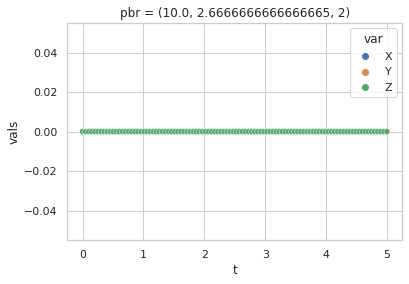

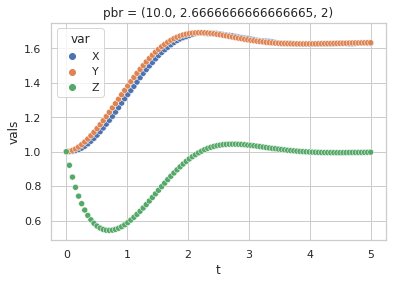

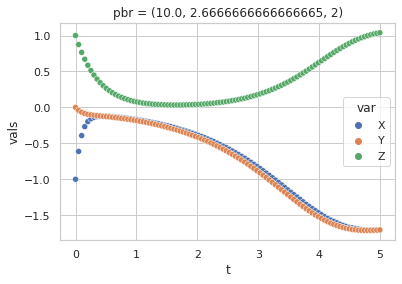

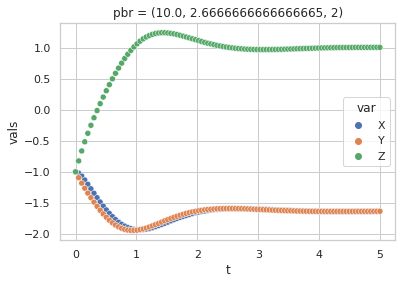

In [96]:
for kk in range(len(XYZs)):
    # %% Solve differential equation
    XYZ = XYZs[kk]
    sol = solve_ivp(lambda t, xyz: lorentz(t, xyz, pbr1), 
                [tspan[0], tspan[-1]], XYZ, t_eval=tspan)
    # Table me
    df = pandas.DataFrame(dict(t=np.array([sol.t]*3).flatten(), vals=sol.y.flatten(),
                          var=['X']*nstep + ['Y']*nstep + ['Z']*nstep))
    # Plot me
    ax = sns.scatterplot(data=df, x='t', y='vals', hue='var')
    ax.set_title('pbr = {}'.format(pbr1))
    plt.show()

### Here, $Z=1$ (other than $Z[t=0]=0$ which is an unstable point) at late times while $X,Y$ have values that depend on the initial conditions

### Last, $pr = 10, b=8/3, r=28$

In [97]:
pbr2 = (10., 8/3., 28)

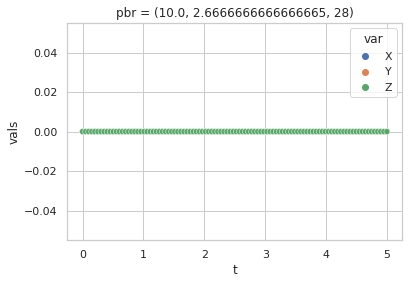

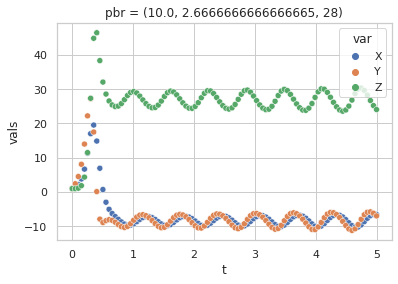

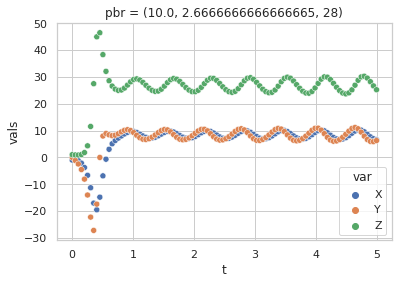

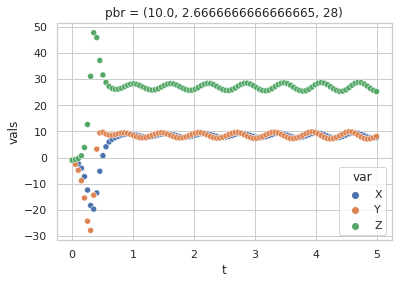

In [99]:
for kk in range(len(XYZs)):
    # %% Solve differential equation
    XYZ = XYZs[kk]
    sol = solve_ivp(lambda t, xyz: lorentz(t, xyz, pbr2), 
                [tspan[0], tspan[-1]], XYZ, t_eval=tspan)
    # Table me
    df = pandas.DataFrame(dict(t=np.array([sol.t]*3).flatten(), vals=sol.y.flatten(),
                          var=['X']*nstep + ['Y']*nstep + ['Z']*nstep))
    # Plot me
    ax = sns.scatterplot(data=df, x='t', y='vals', hue='var')
    ax.set_title('pbr = {}'.format(pbr2))
    plt.show()

### Pretty wild!  Looks like $Z$ is attracted to a value near 28 (Lyaponov stable)

### $X,Y$ also appear Lyaponov stable but to a value that depends on the initial conditions.